In [119]:
# install required packages

# ! pip install -r requirements.txt

In [120]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv('askscience_data.csv')
df.head()

,Unnamed: 0,title,body,tag,datetime,author,score,upvote_ratio,url
0,0,Post viral cough: why does it get worse after ...,Tl;dr: why is your cough during an upper respi...,Human Body,2022-12-09 02:52:07,CarboniferousCreek,1343.0,0.93,https://www.reddit.com/r/askscience/comments/z...
1,1,Can an x-ray of an adult show chronic malnouri...,If a person was chronically undernourished thr...,Human Body,2022-12-08 18:28:51,Foxs-In-A-Trenchcoat,426.0,0.91,https://www.reddit.com/r/askscience/comments/z...
2,2,[META] Bots and AI tools on r/askscience,\n\nOver the past few days we have seen a sur...,META,2022-12-08 09:04:25,AskScienceModerator,2218.0,0.92,https://www.reddit.com/r/askscience/comments/z...
3,3,Can you predictably manipulate a magnetic gas?,Does there exist a gas that changes in respons...,Physics,2022-12-08 20:01:53,hufsa7,48.0,0.83,https://www.reddit.com/r/askscience/comments/z...
4,4,Are there cells in humans (or other mammals) t...,NaN,Medicine,2022-12-09 01:11:34,Velym,14.0,0.89,https://www.reddit.com/r/askscience/comments/z...


In [122]:
df.loc[df["Unnamed: 0"] == 255]

,Unnamed: 0,title,body,tag,datetime,author,score,upvote_ratio,url
255,255,From my kid: Can you put a marshmallow on a st...,"I assume the answer is yes, given the heat of ...",Physics,2017-11-21 18:31:54,StuckInAPuma,11260.0,0.86,https://www.reddit.com/r/askscience/comments/7...
2877,255,Does Acid Rain still happen in the United Stat...,NaN,Earth Sciences,2019-04-14 07:09:11,3oons,10742.0,0.94,https://www.reddit.com/r/askscience/comments/b...


In [123]:
print(f"Length of Unnamed: 0 {df['Unnamed: 0'].nunique()} vs. the shape of the dataframe rows {df.shape[0]}")


Length of Unnamed: 0 2732 vs. the shape of the dataframe rows 4205


Since the Unnamed column share index results and those respective posts seem to unrelated in user, score etc I will drop the column and use the index inferred by pandas on when I read in the CSV.

In [124]:
df = df.drop(columns=['Unnamed: 0'])

In [125]:
df.head()

,title,body,tag,datetime,author,score,upvote_ratio,url
0,Post viral cough: why does it get worse after ...,Tl;dr: why is your cough during an upper respi...,Human Body,2022-12-09 02:52:07,CarboniferousCreek,1343.0,0.93,https://www.reddit.com/r/askscience/comments/z...
1,Can an x-ray of an adult show chronic malnouri...,If a person was chronically undernourished thr...,Human Body,2022-12-08 18:28:51,Foxs-In-A-Trenchcoat,426.0,0.91,https://www.reddit.com/r/askscience/comments/z...
2,[META] Bots and AI tools on r/askscience,\n\nOver the past few days we have seen a sur...,META,2022-12-08 09:04:25,AskScienceModerator,2218.0,0.92,https://www.reddit.com/r/askscience/comments/z...
3,Can you predictably manipulate a magnetic gas?,Does there exist a gas that changes in respons...,Physics,2022-12-08 20:01:53,hufsa7,48.0,0.83,https://www.reddit.com/r/askscience/comments/z...
4,Are there cells in humans (or other mammals) t...,NaN,Medicine,2022-12-09 01:11:34,Velym,14.0,0.89,https://www.reddit.com/r/askscience/comments/z...


In [126]:
# Does URL matter?

df['url'].nunique()

# show the shared URLS that repeat more than once

url_values = df['url'].value_counts()
url_values = url_values[url_values > 1]
url_values

https://www.reddit.com/r/askscience/comments/gtdmys/what_is_the_diameter_of_a_lightning_they_are/         2
https://www.reddit.com/r/askscience/comments/5t7b51/what_is_the_smallest_amount_of_matter_needed_to/      2
https://www.reddit.com/r/askscience/comments/hgttpt/how_can_medicines_like_ibuprofen_and/                 2
https://www.reddit.com/r/askscience/comments/8gw1g2/when_the_mars_rover_went_to_mars_were_they_able/      2
https://www.reddit.com/r/askscience/comments/7pw56k/why_can_completely_paralyzed_people_often_blink/      2
                                                                                                         ..
https://www.reddit.com/r/askscience/comments/9s48sm/whats_the_difference_between_me_thinking_about/       2
https://www.reddit.com/r/askscience/comments/7mmz8i/why_do_computers_and_game_consoles_need_to/           2
https://www.reddit.com/r/askscience/comments/io8zax/when_someone_has_cancer_they_typically_lose_a_lot/    2
https://www.reddit.com/r/ask

In [127]:
# for the urls that are repeated, are the rows the same?

for url in url_values.index:
    print(df.loc[df['url'] == url])

                                                  title body             tag  \
648   What is the diameter of a lightning? They are ...  NaN  Earth Sciences   
3052  What is the diameter of a lightning? They are ...  NaN  Earth Sciences   

                 datetime    author   score  upvote_ratio  \
648   2020-05-30 05:39:05  fmorenol  7852.0          0.95   
3052  2020-05-30 05:39:05  fmorenol  7852.0          0.95   

                                                    url  
648   https://www.reddit.com/r/askscience/comments/g...  
3052  https://www.reddit.com/r/askscience/comments/g...  
                                                  title body      tag  \
540   What is the smallest amount of matter needed t...  NaN  Physics   
3001  What is the smallest amount of matter needed t...  NaN  Physics   

                 datetime   author   score  upvote_ratio  \
540   2017-02-10 05:40:39  vangyyy  8493.0          0.89   
3001  2017-02-10 05:40:39  vangyyy  8496.0          0.89   



In [128]:
# drop duplicates and check again

df = df.drop_duplicates(subset=['url'])

url_values = df['url'].value_counts()
url_values = url_values[url_values > 1]
url_values

Series([], Name: url, dtype: int64)

The rows where duplicates

# Explore the data

In [129]:
df

,title,body,tag,datetime,author,score,upvote_ratio,url
0,Post viral cough: why does it get worse after ...,Tl;dr: why is your cough during an upper respi...,Human Body,2022-12-09 02:52:07,CarboniferousCreek,1343.0,0.93,https://www.reddit.com/r/askscience/comments/z...
1,Can an x-ray of an adult show chronic malnouri...,If a person was chronically undernourished thr...,Human Body,2022-12-08 18:28:51,Foxs-In-A-Trenchcoat,426.0,0.91,https://www.reddit.com/r/askscience/comments/z...
2,[META] Bots and AI tools on r/askscience,\n\nOver the past few days we have seen a sur...,META,2022-12-08 09:04:25,AskScienceModerator,2218.0,0.92,https://www.reddit.com/r/askscience/comments/z...
3,Can you predictably manipulate a magnetic gas?,Does there exist a gas that changes in respons...,Physics,2022-12-08 20:01:53,hufsa7,48.0,0.83,https://www.reddit.com/r/askscience/comments/z...
4,Are there cells in humans (or other mammals) t...,NaN,Medicine,2022-12-09 01:11:34,Velym,14.0,0.89,https://www.reddit.com/r/askscience/comments/z...
...,...,...,...,...,...,...,...,...
4200,I heard some electron microscopes use gallium....,NaN,Engineering,2022-01-12 17:14:35,Emma_Dale20,6.0,0.70,https://www.reddit.com/r/askscience/comments/s...
4201,is the spread of COVID typical for a respirato...,i understand that there's no respiratory virus...,COVID-19,2022-01-12 09:39:55,aggasalk,27.0,0.74,https://www.reddit.com/r/askscience/comments/s...
4202,What is the technical difference between Cheek...,What are the technical difference(s) between t...,COVID-19,2022-01-12 14:47:28,h110hawk,3.0,0.67,https://www.reddit.com/r/askscience/comments/s...
4203,What starts the coagulation cascade during blo...,I understand that stasis of blood increases th...,Human Body,2022-01-12 14:20:26,joegoldbergg,5.0,0.78,https://www.reddit.com/r/askscience/comments/s...


# How many posts are missing tags?

In [130]:
missing_tags = df['tag'].isna().sum()
print(f"Number of posts missing tags: {missing_tags}")

Number of posts missing tags: 194


In [131]:
# Let's create a new tag titles missing. Then we can assess performance later.

df['tag'] = df['tag'].fillna('missing')


In [132]:
# check the distrubtions of the tags

tag_distribution = df['tag'].value_counts()
tag_distribution

Biology                        630
Physics                        561
Human Body                     387
Medicine                       302
Earth Sciences                 271
Astronomy                      236
Chemistry                      207
missing                        194
COVID-19                       188
Engineering                    161
Neuroscience                    98
Planetary Sci.                  98
Mathematics                     92
Psychology                      83
Computing                       48
Paleontology                    43
Linguistics                     27
Social Science                  20
Anthropology                    18
Economics                       14
Archaeology                     14
Interdisciplinary                3
  Linguistics                    2
Meta                             1
Political Science                1
Materials Science                1
Dog Cognition AMA                1
Earth Sciences and Biology       1
CERN AMA            

In [133]:
tag_categories = {
    'Natural Sciences': ['Biology', 'Physics', 'Earth Sciences', 'Astronomy', 'Chemistry'],
    'Health and Medicine': ['Human Body', 'Medicine', 'COVID-19', 'Neuroscience'],
    'Social Sciences': ['Psychology', 'Social Science', 'Anthropology', 'Economics', 'Political Science'],
    'Mathematics': ['Mathematics'],
    'Computing and Technology': ['Computing', 'Engineering'],
    'Paleontology and Archaeology': ['Paleontology', 'Archaeology'],
    'Language and Linguistics': ['Linguistics'],
    'Other': ["Interdisciplinary",'missing',"Meta", 'Planetary Sci.', 'First image of a black hole', 'Dog Cognition AMA', 'CERN AMA', 'Ecology', 'Food']
}

df["tag_category"] = np.nan

for category, tags in tag_categories.items():
    df.loc[df['tag'].isin(tags), 'tag_category'] = category
    
df['tag_category'].value_counts()


Natural Sciences                1905
Health and Medicine              975
Other                            301
Computing and Technology         209
Social Sciences                  136
Mathematics                       92
Paleontology and Archaeology      57
Language and Linguistics          27
Name: tag_category, dtype: int64

While stll unbalanced this is a better starting point for fitting a model.

As we see there are fair amount of tags that have small amounts. I will assing them to larger categories.

In [134]:
# Feature generation

df["author_num_posts"] = df.groupby("author")["author"].transform("count")



In [135]:
df.sort_values(by=['score'], ascending=False).head(10)

,title,body,tag,datetime,author,score,upvote_ratio,url,tag_category,author_num_posts
25,Help us fight for net neutrality!,The ability to browse the internet is at risk....,missing,2017-11-22 11:38:53,MockDeath,83382.0,0.78,https://www.reddit.com/r/askscience/comments/7...,Other,2
26,Stephen Hawking megathread,"We were sad to learn that noted physicist, cos...",Physics,2018-03-13 22:03:48,AskScienceModerator,65835.0,0.85,https://www.reddit.com/r/askscience/comments/8...,Natural Sciences,47
27,Black Lives Matter,**Black lives matter.** The moderation team at...,Social Science,2020-06-02 10:57:46,AskScienceModerator,51927.0,0.68,https://www.reddit.com/r/askscience/comments/g...,Social Sciences,47
28,A message to our users,&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Today in AskScie...,Meta,2015-07-02 19:43:47,MockDeath,39288.0,0.86,https://www.reddit.com/r/askscience/comments/3...,Other,2
29,Why is it that during winter it's not uncommon...,I live in the USA Midwest,Earth Sciences,2018-02-20 08:23:37,This31415926535,37681.0,0.87,https://www.reddit.com/r/askscience/comments/7...,Natural Sciences,1
30,If we could travel at 99.9% the speed of light...,NaN,Physics,2019-01-20 06:57:37,GPL89,34357.0,0.91,https://www.reddit.com/r/askscience/comments/a...,Natural Sciences,1
31,Do giraffes get struck by lightning more often...,NaN,Biology,2017-03-29 08:25:25,DELETED,32564.0,0.90,https://www.reddit.com/r/askscience/comments/6...,Natural Sciences,216
32,What % of my weight am I actually lifting when...,NaN,Physics,2017-10-26 11:25:46,Standby4Rant,32346.0,0.90,https://www.reddit.com/r/askscience/comments/7...,Natural Sciences,1
33,What is the point of using screws with a Phill...,NaN,Engineering,2017-05-27 12:59:49,EthanNewb,31423.0,0.89,https://www.reddit.com/r/askscience/comments/6...,Computing and Technology,1
34,"If hand sanitizer kills 99.99% of germs, then ...",NaN,Biology,2017-10-11 07:00:21,ClF3FTW,28887.0,0.81,https://www.reddit.com/r/askscience/comments/7...,Natural Sciences,1


In [136]:
df[["score", "upvote_ratio", "author_num_posts"]].corr()

,score,upvote_ratio,author_num_posts
score,1.000000,0.510127,0.038453
upvote_ratio,0.510127,1.000000,-0.090872
author_num_posts,0.038453,-0.090872,1.000000


We can say that an author that posts often does not mean that the post will be popular. In fact majority of the top 10 scoring posts are not by repear authors.

In [137]:
# does number of posts correlate with score?
# set backend to plotly

px.scatter(df, x='author_num_posts', y='score', trendline='ols')

In [138]:
# remove author from the dataframe, as this not a feature that we will use for any further EDA or feature generation

df = df.drop(columns=['author'])

# Body

In [139]:
# get missing count


df["body"].isna().sum()

1216

About a quarter of the posts have no body. I will add a column called no body and assign 1 if there is no body and 0 if there is a body.

Then fill the NaN values with a space so that the tokenizer does not throw an error.

In [140]:
df["empty_body"] = df.apply(lambda row: 1 if pd.isna(row["body"]) else 0, axis=1)

In [141]:
df["body"] = df["body"].fillna("")
df

,title,body,tag,datetime,score,upvote_ratio,url,tag_category,author_num_posts,empty_body
0,Post viral cough: why does it get worse after ...,Tl;dr: why is your cough during an upper respi...,Human Body,2022-12-09 02:52:07,1343.0,0.93,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,1,0
1,Can an x-ray of an adult show chronic malnouri...,If a person was chronically undernourished thr...,Human Body,2022-12-08 18:28:51,426.0,0.91,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,2,0
2,[META] Bots and AI tools on r/askscience,\n\nOver the past few days we have seen a sur...,META,2022-12-08 09:04:25,2218.0,0.92,https://www.reddit.com/r/askscience/comments/z...,NaN,47,0
3,Can you predictably manipulate a magnetic gas?,Does there exist a gas that changes in respons...,Physics,2022-12-08 20:01:53,48.0,0.83,https://www.reddit.com/r/askscience/comments/z...,Natural Sciences,1,0
4,Are there cells in humans (or other mammals) t...,,Medicine,2022-12-09 01:11:34,14.0,0.89,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,1,1
...,...,...,...,...,...,...,...,...,...,...
4200,I heard some electron microscopes use gallium....,,Engineering,2022-01-12 17:14:35,6.0,0.70,https://www.reddit.com/r/askscience/comments/s...,Computing and Technology,2,1
4201,is the spread of COVID typical for a respirato...,i understand that there's no respiratory virus...,COVID-19,2022-01-12 09:39:55,27.0,0.74,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,2,0
4202,What is the technical difference between Cheek...,What are the technical difference(s) between t...,COVID-19,2022-01-12 14:47:28,3.0,0.67,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,1,0
4203,What starts the coagulation cascade during blo...,I understand that stasis of blood increases th...,Human Body,2022-01-12 14:20:26,5.0,0.78,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,1,0


In [142]:
# tokenize the body

from nltk.tokenize import word_tokenize

df['body_tokenized'] = df['body'].apply(word_tokenize)

df.head()

,title,body,tag,datetime,score,upvote_ratio,url,tag_category,author_num_posts,empty_body,body_tokenized
0,Post viral cough: why does it get worse after ...,Tl;dr: why is your cough during an upper respi...,Human Body,2022-12-09 02:52:07,1343.0,0.93,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,1,0,"[Tl, ;, dr, :, why, is, your, cough, during, a..."
1,Can an x-ray of an adult show chronic malnouri...,If a person was chronically undernourished thr...,Human Body,2022-12-08 18:28:51,426.0,0.91,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,2,0,"[If, a, person, was, chronically, undernourish..."
2,[META] Bots and AI tools on r/askscience,\n\nOver the past few days we have seen a sur...,META,2022-12-08 09:04:25,2218.0,0.92,https://www.reddit.com/r/askscience/comments/z...,NaN,47,0,"[Over, the, past, few, days, we, have, seen, a..."
3,Can you predictably manipulate a magnetic gas?,Does there exist a gas that changes in respons...,Physics,2022-12-08 20:01:53,48.0,0.83,https://www.reddit.com/r/askscience/comments/z...,Natural Sciences,1,0,"[Does, there, exist, a, gas, that, changes, in..."
4,Are there cells in humans (or other mammals) t...,,Medicine,2022-12-09 01:11:34,14.0,0.89,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,1,1,[]


In [143]:
# get the sentiment of the body

from textblob import TextBlob

df['body_polarity'] = df['body'].apply(lambda x: TextBlob(x).sentiment.polarity)

df['body_polarity'].describe()





count    3707.000000
mean        0.051095
std         0.148985
min        -0.800000
25%         0.000000
50%         0.000000
75%         0.109484
max         1.000000
Name: body_polarity, dtype: float64

In [144]:
df["body_subjectivity"] = df['body'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df['body_subjectivity'].describe()

count    3707.000000
mean        0.292470
std         0.265814
min         0.000000
25%         0.000000
50%         0.333333
75%         0.500000
max         1.000000
Name: body_subjectivity, dtype: float64

For context:  Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Subjectivity lies between [0,1], where 0 defines a fact and 1 defines a very subjective view.

I will leave them as a numeric feature so the model can potentially learn so nuance of the values between -1,0,1. For example -.25

In [145]:
# word count of the body

df['body_word_count'] = df['body'].apply(lambda x: len(x.split()))


In [146]:
df

,title,body,tag,datetime,score,upvote_ratio,url,tag_category,author_num_posts,empty_body,body_tokenized,body_polarity,body_subjectivity,body_word_count
0,Post viral cough: why does it get worse after ...,Tl;dr: why is your cough during an upper respi...,Human Body,2022-12-09 02:52:07,1343.0,0.93,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,1,0,"[Tl, ;, dr, :, why, is, your, cough, during, a...",-0.071049,0.531746,272
1,Can an x-ray of an adult show chronic malnouri...,If a person was chronically undernourished thr...,Human Body,2022-12-08 18:28:51,426.0,0.91,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,2,0,"[If, a, person, was, chronically, undernourish...",0.175000,0.500000,40
2,[META] Bots and AI tools on r/askscience,\n\nOver the past few days we have seen a sur...,META,2022-12-08 09:04:25,2218.0,0.92,https://www.reddit.com/r/askscience/comments/z...,NaN,47,0,"[Over, the, past, few, days, we, have, seen, a...",0.063750,0.589375,91
3,Can you predictably manipulate a magnetic gas?,Does there exist a gas that changes in respons...,Physics,2022-12-08 20:01:53,48.0,0.83,https://www.reddit.com/r/askscience/comments/z...,Natural Sciences,1,0,"[Does, there, exist, a, gas, that, changes, in...",0.034921,0.482540,93
4,Are there cells in humans (or other mammals) t...,,Medicine,2022-12-09 01:11:34,14.0,0.89,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,1,1,[],0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,I heard some electron microscopes use gallium....,,Engineering,2022-01-12 17:14:35,6.0,0.70,https://www.reddit.com/r/askscience/comments/s...,Computing and Technology,2,1,[],0.000000,0.000000,0
4201,is the spread of COVID typical for a respirato...,i understand that there's no respiratory virus...,COVID-19,2022-01-12 09:39:55,27.0,0.74,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,2,0,"[i, understand, that, there, 's, no, respirato...",0.022959,0.315816,85
4202,What is the technical difference between Cheek...,What are the technical difference(s) between t...,COVID-19,2022-01-12 14:47:28,3.0,0.67,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,1,0,"[What, are, the, technical, difference, (, s, ...",0.003333,0.558889,123
4203,What starts the coagulation cascade during blo...,I understand that stasis of blood increases th...,Human Body,2022-01-12 14:20:26,5.0,0.78,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,1,0,"[I, understand, that, stasis, of, blood, incre...",-0.041667,0.325000,42


# Title

In [147]:
# how many titles are null

# how many titles are empty

df["title"].isnull().sum()

0

No missing titles. Likely a feature of Reddit requiring a title.

In [148]:
# how many titles are empty

df["length_title"] = df["title"].apply(lambda x: len(x.split()))

In [149]:
# title polarity

df["title_polarity"] = df["title"].apply(lambda x: TextBlob(x).sentiment.polarity)

df["title_polarity"].describe()

count    3707.000000
mean        0.047784
std         0.198872
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.116667
max         1.000000
Name: title_polarity, dtype: float64

In [150]:
df["title_subjectivity"] = df["title"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

df["title_subjectivity"].describe()

count    3707.000000
mean        0.306769
std         0.288248
min         0.000000
25%         0.000000
50%         0.300000
75%         0.500000
max         1.000000
Name: title_subjectivity, dtype: float64

In [151]:
df

,title,body,tag,datetime,score,upvote_ratio,url,tag_category,author_num_posts,empty_body,body_tokenized,body_polarity,body_subjectivity,body_word_count,length_title,title_polarity,title_subjectivity
0,Post viral cough: why does it get worse after ...,Tl;dr: why is your cough during an upper respi...,Human Body,2022-12-09 02:52:07,1343.0,0.93,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,1,0,"[Tl, ;, dr, :, why, is, your, cough, during, a...",-0.071049,0.531746,272,12,0.050000,0.550
1,Can an x-ray of an adult show chronic malnouri...,If a person was chronically undernourished thr...,Human Body,2022-12-08 18:28:51,426.0,0.91,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,2,0,"[If, a, person, was, chronically, undernourish...",0.175000,0.500000,40,11,0.100000,0.300
2,[META] Bots and AI tools on r/askscience,\n\nOver the past few days we have seen a sur...,META,2022-12-08 09:04:25,2218.0,0.92,https://www.reddit.com/r/askscience/comments/z...,NaN,47,0,"[Over, the, past, few, days, we, have, seen, a...",0.063750,0.589375,91,7,0.000000,0.000
3,Can you predictably manipulate a magnetic gas?,Does there exist a gas that changes in respons...,Physics,2022-12-08 20:01:53,48.0,0.83,https://www.reddit.com/r/askscience/comments/z...,Natural Sciences,1,0,"[Does, there, exist, a, gas, that, changes, in...",0.034921,0.482540,93,7,-0.200000,0.500
4,Are there cells in humans (or other mammals) t...,,Medicine,2022-12-09 01:11:34,14.0,0.89,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,1,1,[],0.000000,0.000000,0,13,-0.125000,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,I heard some electron microscopes use gallium....,,Engineering,2022-01-12 17:14:35,6.0,0.70,https://www.reddit.com/r/askscience/comments/s...,Computing and Technology,2,1,[],0.000000,0.000000,0,16,0.000000,0.000
4201,is the spread of COVID typical for a respirato...,i understand that there's no respiratory virus...,COVID-19,2022-01-12 09:39:55,27.0,0.74,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,2,0,"[i, understand, that, there, 's, no, respirato...",0.022959,0.315816,85,10,-0.166667,0.500
4202,What is the technical difference between Cheek...,What are the technical difference(s) between t...,COVID-19,2022-01-12 14:47:28,3.0,0.67,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,1,0,"[What, are, the, technical, difference, (, s, ...",0.003333,0.558889,123,12,0.000000,0.100
4203,What starts the coagulation cascade during blo...,I understand that stasis of blood increases th...,Human Body,2022-01-12 14:20:26,5.0,0.78,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,1,0,"[I, understand, that, stasis, of, blood, incre...",-0.041667,0.325000,42,8,0.000000,0.000


Additional Feautres

In [152]:
# Readability Metrics:

#  Flesch-Kincaid Grade Level as its more international and likely reddit users are from all over the world
import textstat



df["title_fk"] = df["title"].apply(lambda x: textstat.flesch_kincaid_grade(x))
df["body_fk"] = df["body"].apply(lambda x: textstat.flesch_kincaid_grade(x))

df
 

,title,body,tag,datetime,score,upvote_ratio,url,tag_category,author_num_posts,empty_body,body_tokenized,body_polarity,body_subjectivity,body_word_count,length_title,title_polarity,title_subjectivity,title_fk,body_fk
0,Post viral cough: why does it get worse after ...,Tl;dr: why is your cough during an upper respi...,Human Body,2022-12-09 02:52:07,1343.0,0.93,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,1,0,"[Tl, ;, dr, :, why, is, your, cough, during, a...",-0.071049,0.531746,272,12,0.050000,0.550,4.4,6.0
1,Can an x-ray of an adult show chronic malnouri...,If a person was chronically undernourished thr...,Human Body,2022-12-08 18:28:51,426.0,0.91,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,2,0,"[If, a, person, was, chronically, undernourish...",0.175000,0.500000,40,11,0.100000,0.300,6.4,9.9
2,[META] Bots and AI tools on r/askscience,\n\nOver the past few days we have seen a sur...,META,2022-12-08 09:04:25,2218.0,0.92,https://www.reddit.com/r/askscience/comments/z...,NaN,47,0,"[Over, the, past, few, days, we, have, seen, a...",0.063750,0.589375,91,7,0.000000,0.000,-1.2,9.8
3,Can you predictably manipulate a magnetic gas?,Does there exist a gas that changes in respons...,Physics,2022-12-08 20:01:53,48.0,0.83,https://www.reddit.com/r/askscience/comments/z...,Natural Sciences,1,0,"[Does, there, exist, a, gas, that, changes, in...",0.034921,0.482540,93,7,-0.200000,0.500,9.6,9.3
4,Are there cells in humans (or other mammals) t...,,Medicine,2022-12-09 01:11:34,14.0,0.89,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,1,1,[],0.000000,0.000000,0,13,-0.125000,0.375,6.0,-15.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,I heard some electron microscopes use gallium....,,Engineering,2022-01-12 17:14:35,6.0,0.70,https://www.reddit.com/r/askscience/comments/s...,Computing and Technology,2,1,[],0.000000,0.000000,0,16,0.000000,0.000,5.2,-15.7
4201,is the spread of COVID typical for a respirato...,i understand that there's no respiratory virus...,COVID-19,2022-01-12 09:39:55,27.0,0.74,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,2,0,"[i, understand, that, there, 's, no, respirato...",0.022959,0.315816,85,10,-0.166667,0.500,7.2,17.5
4202,What is the technical difference between Cheek...,What are the technical difference(s) between t...,COVID-19,2022-01-12 14:47:28,3.0,0.67,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,1,0,"[What, are, the, technical, difference, (, s, ...",0.003333,0.558889,123,12,0.000000,0.100,5.6,8.1
4203,What starts the coagulation cascade during blo...,I understand that stasis of blood increases th...,Human Body,2022-01-12 14:20:26,5.0,0.78,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,1,0,"[I, understand, that, stasis, of, blood, incre...",-0.041667,0.325000,42,8,0.000000,0.000,10.0,16.2


In [153]:
# #  Latent Dirichlet Allocation

# # ! pip install gensim

# import pandas as pd
# from gensim import corpora
# from gensim.models import LdaModel

# # Assuming you have a DataFrame named df
# # Assuming 'title' and 'body' are the columns containing text data

# # Combine title and body into a single text column
# df['text'] = df['title'] + ' ' + df['body']

# # Tokenize the text
# tokenized_documents = [text.lower().split() for text in df['text']]

# # Create a dictionary mapping words to unique IDs
# dictionary = corpora.Dictionary(tokenized_documents)

# # Create a bag-of-words representation of the documents
# corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

# # Train the LDA model
# lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary, passes=10)

# # Print the topics and their top words
# topics = lda_model.print_topics(num_words=3)
# for topic in topics:
#     print(topic)


In [154]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

# Assuming you have a DataFrame named df
# Assuming 'title' and 'body' are the columns containing text data

# Combine title and body into a single text column
df['text'] = df['title'] + ' ' + df['body']

# Word2Vec Embeddings
tokenized_text = [word_tokenize(sentence.lower()) for sentence in df['text']]
word2vec_model = Word2Vec(tokenized_text, vector_size=100, window=5, min_count=1, sg=0)
word2vec_model.train(tokenized_text, total_examples=len(tokenized_text), epochs=10)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])


In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming you have a DataFrame named df with a 'text' column containing the combined title and body

# Combine title and body into a single text column
df['text'] = df['title'] + ' ' + df['body']

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Compute TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Calculate average TF-IDF value for each post
average_tfidf_values = tfidf_matrix.mean(axis=1)

# Add the averaged TF-IDF values to the DataFrame
df['average_tfidf'] = average_tfidf_values

# Now df contains the original data along with the averaged TF-IDF values in the 'average_tfidf' column
df

,title,body,tag,datetime,score,upvote_ratio,url,tag_category,author_num_posts,empty_body,...,body_polarity,body_subjectivity,body_word_count,length_title,title_polarity,title_subjectivity,title_fk,body_fk,text,average_tfidf
0,Post viral cough: why does it get worse after ...,Tl;dr: why is your cough during an upper respi...,Human Body,2022-12-09 02:52:07,1343.0,0.93,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,1,0,...,-0.071049,0.531746,272,12,0.050000,0.550,4.4,6.0,Post viral cough: why does it get worse after ...,0.000606
1,Can an x-ray of an adult show chronic malnouri...,If a person was chronically undernourished thr...,Human Body,2022-12-08 18:28:51,426.0,0.91,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,2,0,...,0.175000,0.500000,40,11,0.100000,0.300,6.4,9.9,Can an x-ray of an adult show chronic malnouri...,0.000320
2,[META] Bots and AI tools on r/askscience,\n\nOver the past few days we have seen a sur...,META,2022-12-08 09:04:25,2218.0,0.92,https://www.reddit.com/r/askscience/comments/z...,NaN,47,0,...,0.063750,0.589375,91,7,0.000000,0.000,-1.2,9.8,[META] Bots and AI tools on r/askscience \n\n...,0.000389
3,Can you predictably manipulate a magnetic gas?,Does there exist a gas that changes in respons...,Physics,2022-12-08 20:01:53,48.0,0.83,https://www.reddit.com/r/askscience/comments/z...,Natural Sciences,1,0,...,0.034921,0.482540,93,7,-0.200000,0.500,9.6,9.3,Can you predictably manipulate a magnetic gas?...,0.000422
4,Are there cells in humans (or other mammals) t...,,Medicine,2022-12-09 01:11:34,14.0,0.89,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,1,1,...,0.000000,0.000000,0,13,-0.125000,0.375,6.0,-15.7,Are there cells in humans (or other mammals) t...,0.000194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,I heard some electron microscopes use gallium....,,Engineering,2022-01-12 17:14:35,6.0,0.70,https://www.reddit.com/r/askscience/comments/s...,Computing and Technology,2,1,...,0.000000,0.000000,0,16,0.000000,0.000,5.2,-15.7,I heard some electron microscopes use gallium....,0.000194
4201,is the spread of COVID typical for a respirato...,i understand that there's no respiratory virus...,COVID-19,2022-01-12 09:39:55,27.0,0.74,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,2,0,...,0.022959,0.315816,85,10,-0.166667,0.500,7.2,17.5,is the spread of COVID typical for a respirato...,0.000423
4202,What is the technical difference between Cheek...,What are the technical difference(s) between t...,COVID-19,2022-01-12 14:47:28,3.0,0.67,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,1,0,...,0.003333,0.558889,123,12,0.000000,0.100,5.6,8.1,What is the technical difference between Cheek...,0.000451
4203,What starts the coagulation cascade during blo...,I understand that stasis of blood increases th...,Human Body,2022-01-12 14:20:26,5.0,0.78,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,1,0,...,-0.041667,0.325000,42,8,0.000000,0.000,10.0,16.2,What starts the coagulation cascade during blo...,0.000318


In [156]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Assuming you have a DataFrame named df with 'title' and 'body' columns

# Combine title and body into a single text column
df['text'] = df['title'] + ' ' + df['body']

# Tokenize the text
tokenized_text = [word_tokenize(sentence.lower()) for sentence in df['text']]

# Initialize and train a Word2Vec model
word2vec_model = Word2Vec(tokenized_text, vector_size=100, window=5, min_count=1, sg=0)
word2vec_model.train(tokenized_text, total_examples=len(tokenized_text), epochs=10)

# Initialize an array to store averaged Word2Vec vectors
averaged_word2vec_vectors = []

# Calculate Word2Vec vectors and average them for each post
for tokens in tokenized_text:
    word_vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if word_vectors:
        averaged_vector = np.mean(word_vectors, axis=0)
        averaged_word2vec_vectors.append(averaged_vector)
    else:
        # If no word in the post is in the Word2Vec vocabulary, add a zero vector
        averaged_word2vec_vectors.append(np.zeros(100))  # Assuming vector_size is 100

# Calculate the mean of all the averaged Word2Vec vectors
average_word2vec = np.mean(averaged_word2vec_vectors, axis=0)

# Now 'average_word2vec' contains the single value representing the average Word2Vec vector for all posts
average_word2vec



array([-0.30165204,  0.17559385,  0.23248188,  0.01293909, -0.11799672,
       -0.81873035,  0.21137358,  0.6908596 ,  0.03294058, -0.68986356,
        0.18584408, -0.35131076,  0.29363114,  0.14217016,  0.03780074,
        0.11044823, -0.04885779, -0.24281777, -0.29154965, -0.99182457,
        0.29023072, -0.33999088,  0.41031972, -0.1948496 , -0.35382786,
        0.05859714, -0.25369182, -0.26612532, -0.37215397, -0.13400044,
        0.2912235 ,  0.24626054, -0.07520234, -0.3826607 , -0.0524547 ,
        0.32327995,  0.04676382, -0.3388929 , -0.36363176, -0.40973204,
        0.24494588, -0.3257104 , -0.46257716,  0.11511946,  0.3402812 ,
       -0.45680436,  0.13550776, -0.15902069,  0.13415489,  0.50682175,
        0.30065483, -0.20386827,  0.00189754, -0.1877194 , -0.3015578 ,
        0.00962309,  0.18963407, -0.26934758, -0.14143978,  0.34867045,
        0.15223859, -0.19025642,  0.34677076, -0.13498603, -0.3252216 ,
        0.5174164 ,  0.28822953,  0.18576832, -0.48390934,  0.78

In [157]:
df['average_word2vec'] = averaged_word2vec_vectors
# average word2vec vector for each post

df["avg_word2vec"] = df["average_word2vec"].apply(lambda x: np.mean(x, axis=0))
df.drop(columns=['average_word2vec'], inplace=True)
df

,title,body,tag,datetime,score,upvote_ratio,url,tag_category,author_num_posts,empty_body,...,body_subjectivity,body_word_count,length_title,title_polarity,title_subjectivity,title_fk,body_fk,text,average_tfidf,avg_word2vec
0,Post viral cough: why does it get worse after ...,Tl;dr: why is your cough during an upper respi...,Human Body,2022-12-09 02:52:07,1343.0,0.93,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,1,0,...,0.531746,272,12,0.050000,0.550,4.4,6.0,Post viral cough: why does it get worse after ...,0.000606,0.010280
1,Can an x-ray of an adult show chronic malnouri...,If a person was chronically undernourished thr...,Human Body,2022-12-08 18:28:51,426.0,0.91,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,2,0,...,0.500000,40,11,0.100000,0.300,6.4,9.9,Can an x-ray of an adult show chronic malnouri...,0.000320,0.006158
2,[META] Bots and AI tools on r/askscience,\n\nOver the past few days we have seen a sur...,META,2022-12-08 09:04:25,2218.0,0.92,https://www.reddit.com/r/askscience/comments/z...,NaN,47,0,...,0.589375,91,7,0.000000,0.000,-1.2,9.8,[META] Bots and AI tools on r/askscience \n\n...,0.000389,0.000489
3,Can you predictably manipulate a magnetic gas?,Does there exist a gas that changes in respons...,Physics,2022-12-08 20:01:53,48.0,0.83,https://www.reddit.com/r/askscience/comments/z...,Natural Sciences,1,0,...,0.482540,93,7,-0.200000,0.500,9.6,9.3,Can you predictably manipulate a magnetic gas?...,0.000422,0.000399
4,Are there cells in humans (or other mammals) t...,,Medicine,2022-12-09 01:11:34,14.0,0.89,https://www.reddit.com/r/askscience/comments/z...,Health and Medicine,1,1,...,0.000000,0,13,-0.125000,0.375,6.0,-15.7,Are there cells in humans (or other mammals) t...,0.000194,0.022404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,I heard some electron microscopes use gallium....,,Engineering,2022-01-12 17:14:35,6.0,0.70,https://www.reddit.com/r/askscience/comments/s...,Computing and Technology,2,1,...,0.000000,0,16,0.000000,0.000,5.2,-15.7,I heard some electron microscopes use gallium....,0.000194,0.003545
4201,is the spread of COVID typical for a respirato...,i understand that there's no respiratory virus...,COVID-19,2022-01-12 09:39:55,27.0,0.74,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,2,0,...,0.315816,85,10,-0.166667,0.500,7.2,17.5,is the spread of COVID typical for a respirato...,0.000423,0.019096
4202,What is the technical difference between Cheek...,What are the technical difference(s) between t...,COVID-19,2022-01-12 14:47:28,3.0,0.67,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,1,0,...,0.558889,123,12,0.000000,0.100,5.6,8.1,What is the technical difference between Cheek...,0.000451,0.017945
4203,What starts the coagulation cascade during blo...,I understand that stasis of blood increases th...,Human Body,2022-01-12 14:20:26,5.0,0.78,https://www.reddit.com/r/askscience/comments/s...,Health and Medicine,1,0,...,0.325000,42,8,0.000000,0.000,10.0,16.2,What starts the coagulation cascade during blo...,0.000318,0.001687


In [158]:
# cluster the posts based on all numerical features PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[["upvote_ratio", "author_num_posts", "empty_body", "body_polarity", "body_subjectivity", "body_word_count", "length_title", "title_polarity", "title_subjectivity",
        "average_tfidf","avg_word2vec", "title_fk","body_fk"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [159]:


# for col in X.columns:
#     fig = sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=X[col])
#     # add a title
#     fig.set_title(f"PCA: Color by {col}")
#     plt.show()
    

we see 2 distinct clusters. that are perfectly seperated by our empty body flag.

In [160]:
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2)
# X_tsne = tsne.fit_transform(X_scaled)


# # plot the result clusters

# for col in X.columns:
#     fig = sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=X[col])#, s=50, alpha=0.7)
#     fig.set_title(col)
#     plt.show()
    

# Modeling

In [161]:
df.columns

Index(['title', 'body', 'tag', 'datetime', 'score', 'upvote_ratio', 'url',
       'tag_category', 'author_num_posts', 'empty_body', 'body_tokenized',
       'body_polarity', 'body_subjectivity', 'body_word_count', 'length_title',
       'title_polarity', 'title_subjectivity', 'title_fk', 'body_fk', 'text',
       'average_tfidf', 'avg_word2vec'],
      dtype='object')

In [162]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

modeling_df = df[["upvote_ratio", "author_num_posts", "empty_body", "body_polarity", "body_subjectivity", "body_word_count", "length_title", "title_polarity", "title_subjectivity",
        "average_tfidf","avg_word2vec", "title_fk","body_fk","score","tag_category"]]

train, test = train_test_split(modeling_df, test_size=0.33, random_state=42)

train


,upvote_ratio,author_num_posts,empty_body,body_polarity,body_subjectivity,body_word_count,length_title,title_polarity,title_subjectivity,average_tfidf,avg_word2vec,title_fk,body_fk,score,tag_category
1206,0.67,1,0,0.000000,0.000000,1,21,0.000000,0.000000,0.000338,0.022275,2.7,433.2,7.0,Natural Sciences
509,0.95,1,1,0.000000,0.000000,0,23,-0.225000,0.458333,0.000243,0.028499,6.4,-15.7,8707.0,Health and Medicine
597,0.91,1,1,0.000000,0.000000,0,9,0.068182,0.477273,0.000167,0.003135,6.8,-15.7,8173.0,Mathematics
1587,0.61,1,0,-0.059821,0.577266,53,12,0.000000,0.000000,0.000370,-0.017621,6.8,6.4,9.0,Health and Medicine
981,0.91,1,0,0.000000,0.000000,7,17,0.000000,0.000000,0.000268,0.021832,5.2,3.7,6335.0,Health and Medicine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.71,1,0,0.114286,0.448413,138,5,0.000000,0.000000,0.000572,0.010145,14.7,11.0,4.0,Health and Medicine
1294,0.82,1,0,0.081771,0.483854,175,14,0.400000,0.800000,0.000513,-0.003872,2.9,7.3,30.0,Natural Sciences
860,0.92,1,0,0.050000,0.150000,16,16,0.250000,0.300000,0.000278,0.030436,7.2,8.8,6758.0,Paleontology and Archaeology
4003,0.88,1,0,0.083333,0.216667,34,13,0.000000,0.000000,0.000273,-0.006357,15.4,14.6,6.0,Natural Sciences


In [163]:
# predictor = TabularPredictor(label='score').fit(train, presets='best_quality')
# lightgbm
# ! pip install verstack


train.columns

Index(['upvote_ratio', 'author_num_posts', 'empty_body', 'body_polarity',
       'body_subjectivity', 'body_word_count', 'length_title',
       'title_polarity', 'title_subjectivity', 'average_tfidf', 'avg_word2vec',
       'title_fk', 'body_fk', 'score', 'tag_category'],
      dtype='object')

In [164]:
# encoding_dict = {val:ix for ix, val in enumerate(train['tag_category'].unique())}
# train['tag_category'] = train['tag_category'].map(encoding_dict)
# train['tag_category'] = train['tag_category'].astype('category')
# print(train['tag_category'].dtype)

# encoding_dict = {val:ix for ix, val in enumerate(test['tag_category'].unique())}
# test['tag_category'] = test['tag_category'].map(encoding_dict)
# test['tag_category'] = test['tag_category'].astype('category')
# print(test['tag_category'].dtype)


In [165]:
# fit verstack model lightgbm

from verstack import LGBMTuner

train = pd.get_dummies(train, columns=['tag_category'])
test = pd.get_dummies(test, columns=['tag_category'])

X_train = train.drop(columns=['score'])
y_train = train['score']

X_test = test.drop(columns=['score'])
y_test = test['score']





 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 100 trials
     .. Evaluation metric: rmse 
     .. Study direction: minimize rmse

     . Trial number: 0 finished
     .. Optimization score (lower-better): rmse: 4140.226511597994
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): rmse: 3612.4593741207696
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): rmse: 4608.218870506962
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-better): rmse: 3589.1391734791155
 ...........................................................................
     . Trial number: 4 finished
     .. Optimization score (lower-better): rmse: 3517.0812128399457
 ................................................

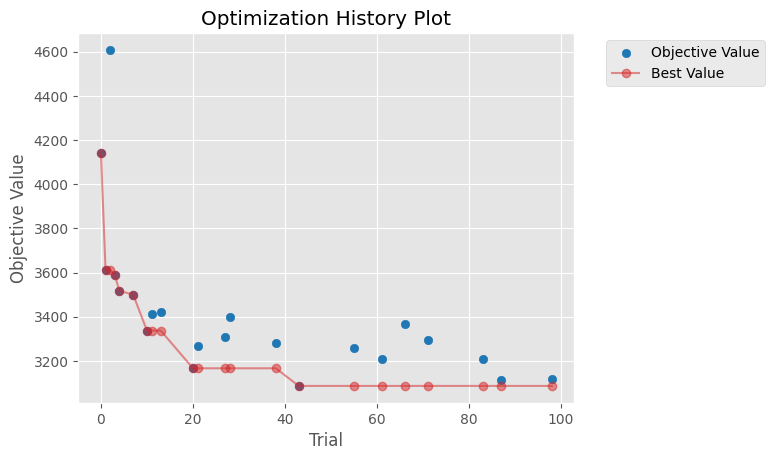

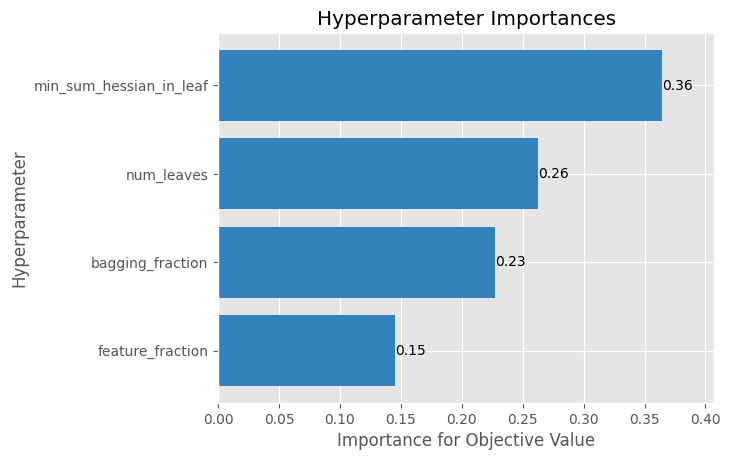

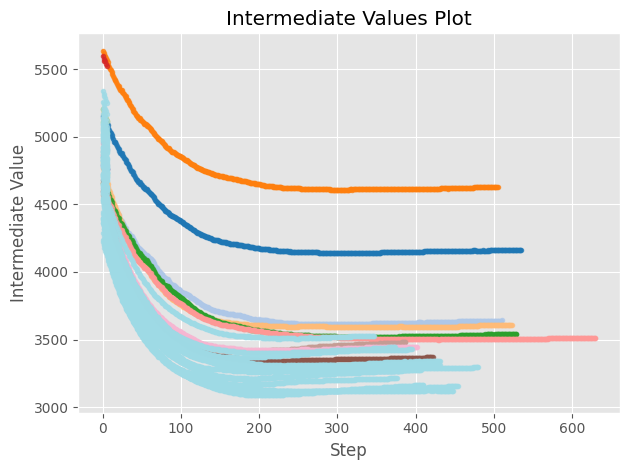

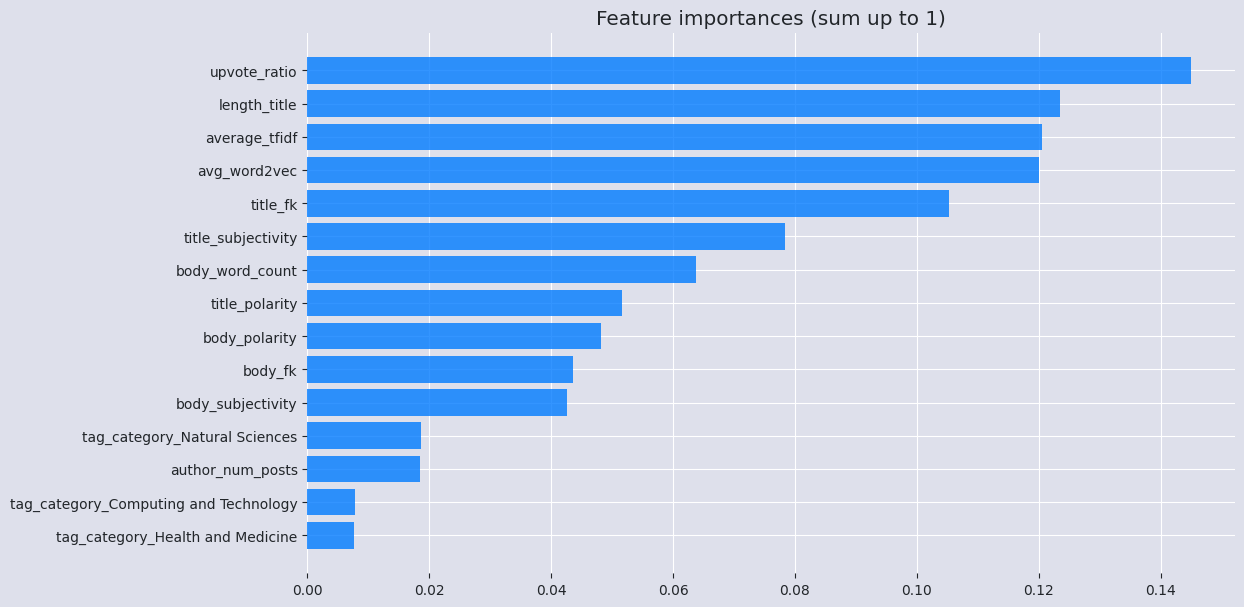


     . Optuna hyperparameters optimization finished
     .. Best trial number:43    |     rmse:            3086.241843573352
 ---------------------------------------------------------------------------

Time elapsed for fit execution: 27.47473 seconds


RMSE: 4847.796528151682
MAE: 2305.333409892074
R2: 0.3175345412214904


In [167]:
tuner = LGBMTuner(metric = 'rmse') # <- the only required argument
tuner.fit(X_train, y_train)

pred = tuner.predict(X_test)
# plot predictions vs actual

fig = px.scatter(x=y_test, y=pred, trendline='ols')
fig.update_layout(title='Predictions vs. Actual',
                   xaxis_title="Actual",
                   yaxis_title="Predicted")

fig.show()

print(f"RMSE: {mean_squared_error(y_test, pred, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, pred)}")
print(f"R2: {r2_score(y_test, pred)}")

In [111]:
pred = tuner.predict(X_test)


In [115]:
# plot predictions vs actual

fig = px.scatter(x=y_test, y=pred, trendline='ols')
fig.update_layout(title='Predictions vs. Actual',
                   xaxis_title="Actual",
                   yaxis_title="Predicted")

fig.show()

In [114]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print(f"RMSE: {mean_squared_error(y_test, pred, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, pred)}")
print(f"R2: {r2_score(y_test, pred)}")


RMSE: 4830.325150132545
MAE: 2257.9602931948966
R2: 0.32244486519922344
